In [13]:
#For the import of packages
import os
import numpy as np
import pandas as pd
from qiime2 import Visualization
import matplotlib.pyplot as plt
import qiime2 as q2

data_dir = "data"

if not os.path.isdir(data_dir):
    os.makedirs(data_dir)

In [14]:
#data import
! wget -nv -O ../$data_dir/sequences_demux_paired.qza 'https://polybox.ethz.ch/index.php/s/KEQxsekRow6lOAz/download'
! wget -nv -O ../$data_dir/metadata.tsv 'https://polybox.ethz.ch/index.php/s/RVPyoVYUBeVQFrJ/download'

2022-10-26 09:45:32 URL:https://polybox.ethz.ch/index.php/s/KEQxsekRow6lOAz/download [8529260946/8529260946] -> "../data/sequences_demux_paired.qza" [1]
2022-10-26 09:45:33 URL:https://polybox.ethz.ch/index.php/s/RVPyoVYUBeVQFrJ/download [325995/325995] -> "../data/metadata.tsv" [1]


In [15]:
df_meta = pd.read_csv(f'../{data_dir}/metadata.tsv', sep='\t')

In [16]:
#first lose all host_id duplicates
#here this is not problematic because the columns of interest (preterm. delivery_mode, birth weight etc.) are all the same for each host_id
df_meta_red = df_meta.drop_duplicates(subset=['host_id'])
df_meta_red.to_csv('df_meta_noduplicates.tsv', sep="\t")

1. Differences in birth weight in preterm and non-preterm delivery babies

Preterm average weight: 2404.62
Non-preterm average weight: 2813.95
Difference: -409.33


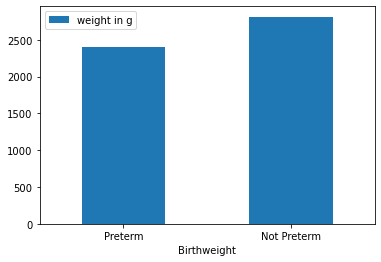

In [17]:
preterm = df_meta_red[df_meta_red['delivery_preterm'] == True]
notpreterm = df_meta_red[df_meta_red['delivery_preterm'] == False]
#calculate average
preterm_weight = preterm['birth_weight_g'].mean()
notpreterm_weight = notpreterm['birth_weight_g'].mean()

print('Preterm average weight:', round(preterm_weight,2))
print('Non-preterm average weight:', round(notpreterm_weight, 2))
print('Difference:', round(preterm_weight - notpreterm_weight,2))

weights = pd.DataFrame({'Birthweight':['Preterm', 'Not Preterm'], 'weight in g':[preterm_weight, notpreterm_weight]})
plot = weights.plot.bar(x='Birthweight', y = 'weight in g', rot=0)

Index(['id', 'Library Layout', 'Instrument', 'collection_date',
       'geo_location_name', 'geo_latitude', 'geo_longitude', 'host_id',
       'age_days', 'weight_kg', 'length_cm', 'WAZ', 'HAZ', 'WHZ', 'BMI',
       'birth_weight_g', 'birth_length_cm', 'sex', 'delivery_mode', 'zygosity',
       'race', 'ethnicity', 'delivery_preterm', 'diet_milk', 'diet_weaning',
       'age_months'],
      dtype='object')


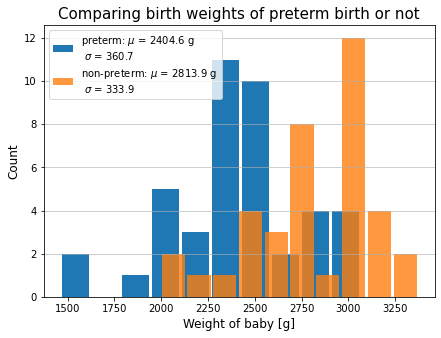

In [18]:
print(df_meta_red.columns)
plt.figure(figsize = (7, 5))
plt.hist(preterm['birth_weight_g'], rwidth=0.9)
plt.hist(notpreterm['birth_weight_g'], alpha = 0.8, rwidth=0.9)
plt.legend([f'preterm: $\mu$ = {round(preterm.birth_weight_g.mean(), 1)} g \n $\sigma$ = {round((preterm.birth_weight_g.var())**(1/2), 1)} ', 
            f'non-preterm: $\mu$ = {round(notpreterm.birth_weight_g.mean(), 1)} g \n $\sigma$ = {round((notpreterm.birth_weight_g.var())**(1/2), 1)}'])
plt.xlabel('Weight of baby [g]', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Comparing birth weights of preterm birth or not', fontsize = 15)
plt.grid(axis='y', alpha=0.75)

2. Differences in birth height in preterm and non-preterm delivery babies

Preterm average length: 47.19
Non-preterm average length: 49.37
Difference: -2.18


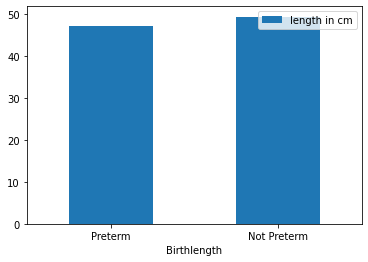

In [19]:
#calculate average
preterm_length = preterm['birth_length_cm'].mean()
notpreterm_length = notpreterm['birth_length_cm'].mean()

print('Preterm average length:', round(preterm_length,2))
print('Non-preterm average length:', round(notpreterm_length,2))
print('Difference:', round(preterm_length - notpreterm_length,2))

length = pd.DataFrame({'Birthlength':['Preterm', 'Not Preterm'], 'length in cm':[preterm_length, notpreterm_length]})
plot = length.plot.bar(x='Birthlength', y = 'length in cm', rot=0)

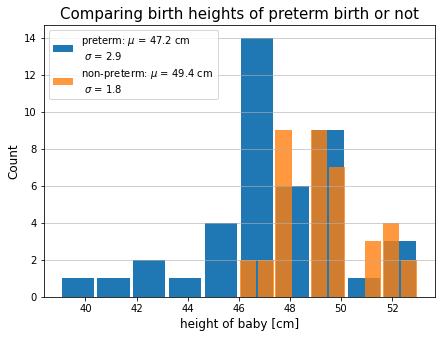

In [20]:
plt.figure(figsize = (7, 5))
plt.hist(preterm['birth_length_cm'], rwidth=0.9)
plt.hist(notpreterm['birth_length_cm'], alpha = 0.8, rwidth=0.9)
plt.legend([f'preterm: $\mu$ = {round(preterm.birth_length_cm.mean(), 1)} cm \n $\sigma$ = {round((preterm.birth_length_cm.var())**(1/2), 1)} ', 
            f'non-preterm: $\mu$ = {round(notpreterm.birth_length_cm.mean(), 1)} cm \n $\sigma$ = {round((notpreterm.birth_length_cm.var())**(1/2), 1)}'])
plt.xlabel('height of baby [cm]', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Comparing birth heights of preterm birth or not', fontsize = 15)
plt.grid(axis='y', alpha=0.75)

3. Preterm delivery and delivery mode

Percentage of preterm deliveries for different delivery modes:
Cesarean: 58.33
Vaginal: 41.38
Cesarean Emergency: 66.67


Text(0.5, 1.0, 'Percentage of preterm deliveries for different delivery modes')

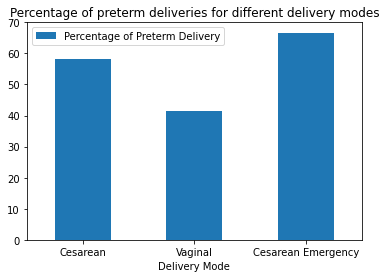

In [21]:
ces = df_meta_red[df_meta_red['delivery_mode'] == 'Cesarean']
vag = df_meta_red[df_meta_red['delivery_mode'] == 'Vaginal']
emerg = df_meta_red[df_meta_red['delivery_mode'] == 'Cesarean_emergency']

ces_tot = ces['id'].nunique()
vag_tot = vag['id'].nunique()
emerg_tot = emerg['id'].nunique()

ces_pre = ces['delivery_preterm'].sum()
vag_pre = vag['delivery_preterm'].sum()
emerg_pre = emerg['delivery_preterm'].sum()

print('Percentage of preterm deliveries for different delivery modes:')
print('Cesarean:', round(ces_pre/ces_tot*100,2))
print('Vaginal:', round(vag_pre/vag_tot*100,2))
print('Cesarean Emergency:', round(emerg_pre/emerg_tot*100, 2))

modes = pd.DataFrame({'Delivery Mode':['Cesarean', 'Vaginal', 'Cesarean Emergency'], 'Percentage of Preterm Delivery':[(ces_pre/ces_tot)*100, (vag_pre/vag_tot)*100, (emerg_pre/emerg_tot)*100]})
plot = modes.plot.bar(x='Delivery Mode', y='Percentage of Preterm Delivery', rot=0)
plt.title('Percentage of preterm deliveries for different delivery modes')

4. Distribution of sexes

Distribution of sexes:
Female: 39
Male: 41


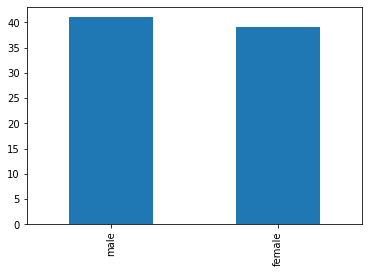

In [22]:
females = df_meta_red['id'][df_meta_red['sex'] == "female"].nunique()
males = df_meta_red['id'][df_meta_red['sex'] == "male"].nunique()
print('Distribution of sexes:')
print('Female:', females)
print('Male:', males)
plot = df_meta_red['sex'].value_counts().plot.bar()

5. Distribution of Zygosity

Distribution of Zygosity:
Monozygotic: 42
Dizygotic: 36
Unknown: 2


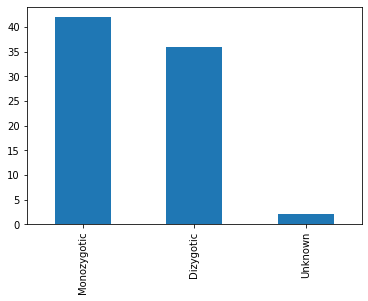

In [23]:
dizygotic = df_meta_red['id'][df_meta_red['zygosity'] == "Dizygotic"].nunique()
monozygotic = df_meta_red['id'][df_meta_red['zygosity'] == "Monozygotic"].nunique()
unknown = df_meta_red['id'][df_meta_red['zygosity'] == "Unknown"].nunique()
print('Distribution of Zygosity:')
print('Monozygotic:', monozygotic)
print('Dizygotic:', dizygotic)
print('Unknown:', unknown)
plot = df_meta_red['zygosity'].value_counts().plot.bar()

6. Distribution of Race

Distribution of Race:
African-American: 10
Caucasian: 70


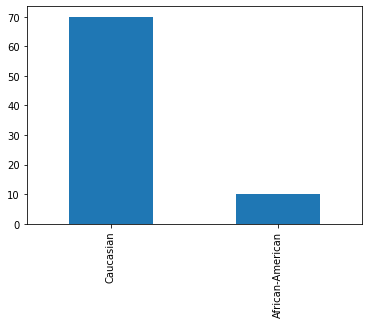

In [24]:
caucasian = df_meta_red['id'][df_meta_red['race'] == "Caucasian"].nunique()
africanamerican = df_meta_red['id'][df_meta_red['race'] == "African-American"].nunique()


print('Distribution of Race:')
print('African-American:', africanamerican)
print('Caucasian:', caucasian)

plot = df_meta_red['race'].value_counts().plot.bar()